In [ ]:
import os 
from dotenv import load_dotenv
import numpy as np
from sklearn.manifold import TSNE
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma
import matplotlib.pyplot as plt

embeddings = OpenAIEmbeddings()
load_dotenv(override=True)

Matplotlib is building the font cache; this may take a moment.


True

In [16]:
vector_store = Chroma(persist_directory=os.environ['db_name'], embedding_function=embeddings)
collection = vector_store._collection

In [17]:
result = collection.get(include=['embeddings', 'documents', 'metadatas'])
vectors = np.array(result['embeddings'])
documents = result['documents']
doc_types = [metadata['doc_type'] for metadata in result['metadatas']]
colors = [['blue', 'green', 'red', 'orange'][['products', 'employees', 'contracts', 'company'].index(t)] for t in doc_types]

### 2D Visualization

/var/folders/9z/m3y6w4rd5_dg2mz4g9jklpsc0000gn/T/ipykernel_18944/364778563.py:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



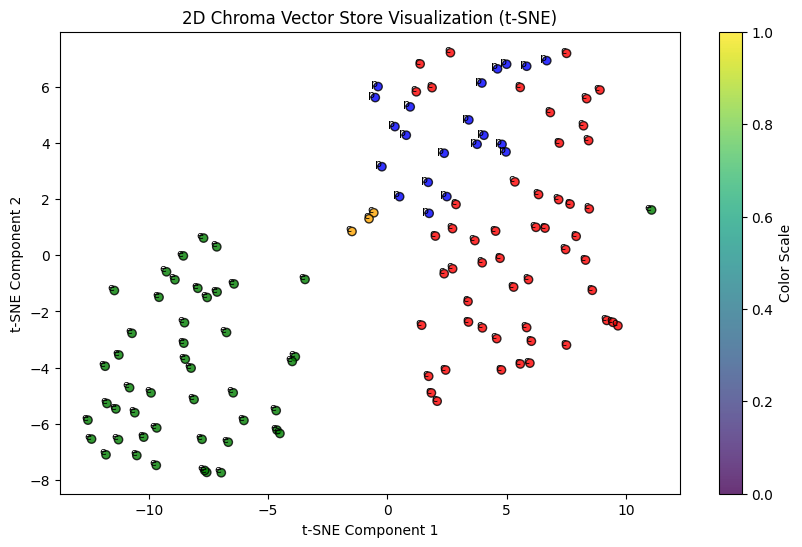

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    reduced_vectors[:, 0], reduced_vectors[:, 1],
    c=colors, cmap='viridis', alpha=0.8, edgecolors='k'
)

for i, (x, y) in enumerate(reduced_vectors):
    plt.text(x, y, doc_types[i][0], fontsize=8, ha='right')

plt.title("2D Chroma Vector Store Visualization (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Color Scale")

plt.show()

### 3D Visualization

/var/folders/9z/m3y6w4rd5_dg2mz4g9jklpsc0000gn/T/ipykernel_18944/174801903.py:10: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



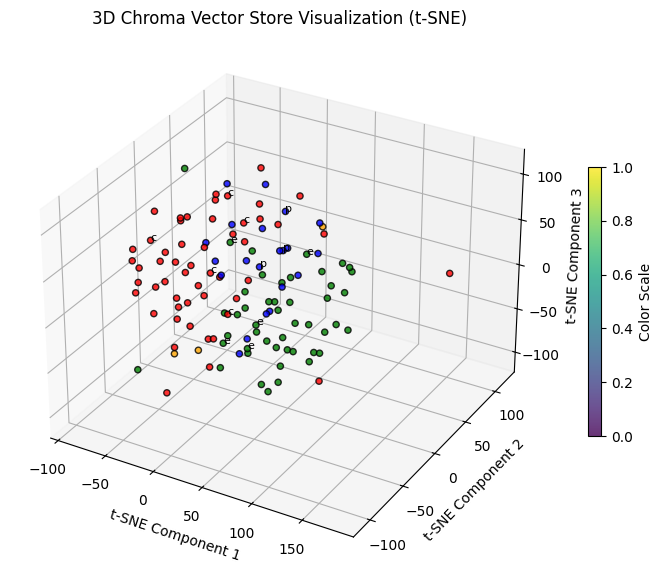

In [ ]:
tsne = TSNE(n_components=3, random_state=42)
reduced_vectors = tsne.fit_transform(vectors)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2],
    c=colors, cmap='viridis', alpha=0.8, edgecolors='k'
)

# Adding labels for a few points to reduce clutter
for i in range(0, len(documents), 10):  
    ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], 
            doc_types[i][0], fontsize=8)

ax.set_title("3D Chroma Vector Store Visualization (t-SNE)")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")

cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label("Color Scale")

plt.show()